# lab 10-1. mnist_softmax

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import random

from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
tf.set_random_seed(777)  # reproducibility

In [ ]:
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [ ]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [ ]:
# weights & bias for nn layers
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

hypothesis = tf.matmul(X, W) + b

In [ ]:
# parameters
learning_rate = 0.001
batch_size = 100
num_epochs = 50
num_iterations = int(mnist.train.num_examples / batch_size)

In [ ]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis,
                                                                 labels=Y)) # tf.stop_gradient(Y)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [ ]:
correct_prediction = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Epoch: 0001, Cost: 5.740407493
Epoch: 0002, Cost: 1.784547318
Epoch: 0003, Cost: 1.123414178
Epoch: 0004, Cost: 0.871816431
Epoch: 0005, Cost: 0.737888697
Epoch: 0006, Cost: 0.653638832
Epoch: 0007, Cost: 0.595823816
Epoch: 0008, Cost: 0.551498073
Epoch: 0009, Cost: 0.517661086
Epoch: 0010, Cost: 0.490342496
Epoch: 0011, Cost: 0.467437439
Epoch: 0012, Cost: 0.448646405
Epoch: 0013, Cost: 0.432580647
Epoch: 0014, Cost: 0.417996921
Epoch: 0015, Cost: 0.406005365
Epoch: 0016, Cost: 0.394981482
Epoch: 0017, Cost: 0.385174315
Epoch: 0018, Cost: 0.376458622
Epoch: 0019, Cost: 0.368578255
Epoch: 0020, Cost: 0.361309899
Epoch: 0021, Cost: 0.354499738
Epoch: 0022, Cost: 0.348242086
Epoch: 0023, Cost: 0.342781295
Epoch: 0024, Cost: 0.337567137
Epoch: 0025, Cost: 0.332133334
Epoch: 0026, Cost: 0.327776795
Epoch: 0027, Cost: 0.323407127
Epoch: 0028, Cost: 0.319921910
Epoch: 0029, Cost: 0.315578569
Epoch: 0030, Cost: 0.312265854
Epoch: 0031, Cost: 0.308633676
Epoch: 0032, Cost: 0.305853695
Epoch: 0

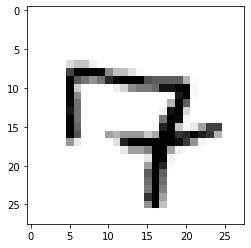

In [ ]:
# train my model
with tf.Session() as sess:
    # initialize
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        avg_cost = 0

        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={
                                   X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print(f"Epoch: {(epoch + 1):04d}, Cost: {avg_cost:.9f}")

    print("Learning Finished!")


    # Test model and check accuracy
    print(
        "Accuracy:",
        sess.run(accuracy, feed_dict={
                 X: mnist.test.images, Y: mnist.test.labels}),
    )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)

    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r: r + 1], axis=1)))
    print(
        "Prediction: ",
        sess.run(
            tf.argmax(hypothesis, axis=1), feed_dict={X: mnist.test.images[r: r + 1]}
        ),
    )

    plt.imshow(
        mnist.test.images[r: r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()

# Lab 10-2. NN for MNIST

In [ ]:
tf.set_random_seed(777)  # reproducibility # 그래프 등 초기화가 더 필요한 것 같음

In [ ]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [ ]:
# weights & bias for nn layers
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1) # relu

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3 # logit()

In [ ]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Epoch: 0001 cost = 172.198386345
Epoch: 0002 cost = 41.433380794
Epoch: 0003 cost = 26.012403933
Epoch: 0004 cost = 18.027297055
Epoch: 0005 cost = 12.951393856
Epoch: 0006 cost = 9.589643244
Epoch: 0007 cost = 6.968239921
Epoch: 0008 cost = 5.322793016
Epoch: 0009 cost = 3.912074988
Epoch: 0010 cost = 3.005298133
Epoch: 0011 cost = 2.273066951
Epoch: 0012 cost = 1.705506068
Epoch: 0013 cost = 1.342641412
Epoch: 0014 cost = 0.962704116
Epoch: 0015 cost = 0.835807902
Learning Finished!
Accuracy: 0.9483
Label:  [7]
Prediction:  [7]


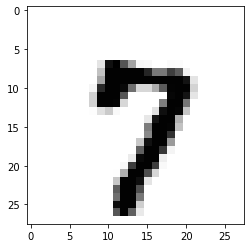

In [ ]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

# Lab 10-3. MNIST and Xavier

In [ ]:
tf.set_random_seed(777)  # reproducibility

In [ ]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [ ]:
# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow

W1 = tf.get_variable("W1", shape=[784, 256],
                     initializer=tf.contrib.layers.xavier_initializer()) # 초깃값 설정, Xavier method
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[256, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[256, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

In [ ]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Epoch: 0001 cost = 0.300424017
Epoch: 0002 cost = 0.108236364
Epoch: 0003 cost = 0.069677815
Epoch: 0004 cost = 0.050017829
Epoch: 0005 cost = 0.037656679
Epoch: 0006 cost = 0.027836551
Epoch: 0007 cost = 0.022615208
Epoch: 0008 cost = 0.016935651
Epoch: 0009 cost = 0.014912009
Epoch: 0010 cost = 0.014018425
Epoch: 0011 cost = 0.011504116
Epoch: 0012 cost = 0.012236132
Epoch: 0013 cost = 0.011835457
Epoch: 0014 cost = 0.008149328
Epoch: 0015 cost = 0.010365069
Learning Finished!
Accuracy: 0.9812
Label:  [9]
Prediction:  [9]


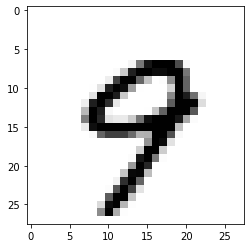

In [ ]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [ ]:
# 초기값 설정이 잘 되어있음
# 초기부터 cost가 낮음
# 에포크 수가 적고 걸리는 시간이 적음 
# 성과가 좋음

# Lab 10-4. MNIST and Deep NN
- deep and wide
- 그러나 성과가 생각만큼 좋지 않다
- why. overfitting!

In [ ]:
tf.reset_default_graph()
tf.set_random_seed(777)  # reproducibility

In [ ]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [ ]:
# weights & bias for nn layers
# 넓고 깊게

W1 = tf.get_variable("W1", shape=[784, 512], 
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

In [ ]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Epoch: 0001 cost = 0.302696740
Epoch: 0002 cost = 0.100880447
Epoch: 0003 cost = 0.070176514
Epoch: 0004 cost = 0.051538022
Epoch: 0005 cost = 0.042535167
Epoch: 0006 cost = 0.034356815
Epoch: 0007 cost = 0.030214729
Epoch: 0008 cost = 0.028388842
Epoch: 0009 cost = 0.022074910
Epoch: 0010 cost = 0.020478860
Epoch: 0011 cost = 0.019996910
Epoch: 0012 cost = 0.018203194
Epoch: 0013 cost = 0.016965432
Epoch: 0014 cost = 0.014417414
Epoch: 0015 cost = 0.014299540
Learning Finished!
Accuracy: 0.9799
Label:  [2]
Prediction:  [2]


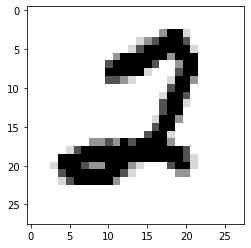

In [ ]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

# Lab 10-5. Dropout for MNIST
- 과적합을 피해 성과가 올라간다

In [ ]:
tf.reset_default_graph()
tf.set_random_seed(777)  # reproducibility

In [ ]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# dropout (keep_prob) rate (0.5~) 0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

In [ ]:
# weights & bias for nn layers

W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, rate = 1 - keep_prob)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, rate = 1 - keep_prob)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, rate = 1 - keep_prob)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, rate = 1 - keep_prob)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

In [ ]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Epoch: 0001 cost = 0.459947097
Epoch: 0002 cost = 0.169412336
Epoch: 0003 cost = 0.133679466
Epoch: 0004 cost = 0.108132526
Epoch: 0005 cost = 0.093084773
Epoch: 0006 cost = 0.080279339
Epoch: 0007 cost = 0.074868482
Epoch: 0008 cost = 0.070426885
Epoch: 0009 cost = 0.062059378
Epoch: 0010 cost = 0.060610982
Epoch: 0011 cost = 0.053612716
Epoch: 0012 cost = 0.052415001
Epoch: 0013 cost = 0.050527583
Epoch: 0014 cost = 0.047272496
Epoch: 0015 cost = 0.046043375
Learning Finished!
Accuracy: 0.9822
Label:  [2]
Prediction:  [2]


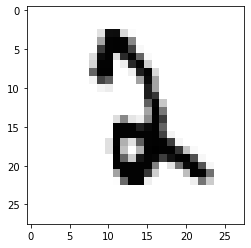

In [ ]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1})) # 테스트를 할 때는 1, 전체 네트워크 사용

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))
plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()